<a href="https://colab.research.google.com/github/chiaravanin/CursoCoder/blob/main/ProyectoDS_PArteIIVANIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO DATA SCIENCE - ENTREGA FINAL: Algoritmo de Clasificación

✅**ABSTRACT Parte I:**
Este proyecto analiza un dataset de clientes de una entidad bancaria argentina que incluye variables sociodemográficas (edad, género, provincia), productos contratados (tarjetas, seguros, cuentas, plazos fijos), nivel de digitalización y comportamiento de uso.

El objetivo es identificar patrones de comportamiento y segmentación que permitan a la institución mejorar su estrategia comercial y de retención de clientes, a través de un análisis exploratorio de datos (EDA) con técnicas univariadas, bivariadas y multivariadas.

Se emplearán herramientas de análisis en Python como Pandas, Matplotlib y Seaborn para generar visualizaciones interactivas y detectar relaciones significativas entre variables clave (por ejemplo: edad, producto contratado y uso digital). Además, se busca proponer recomendaciones basadas en insights obtenidos del comportamiento de la cartera.

# ⁉**Preguntas / Hipótesis de interés**

Distribución y perfil de clientes

¿Cómo se distribuye la cartera según edad, género y provincia?

H1: La mayor proporción de clientes se concentra en rangos etarios intermedios (30-50 años) y en provincias con mayor densidad poblacional.

¿Existen diferencias significativas en la cantidad de productos contratados entre segmentos de edad y género?

H2: Clientes de mayor edad tienden a tener más productos contratados.

Productos bancarios

¿Qué combinaciones de productos son más frecuentes por tipo de cliente?

H3: Los clientes con tarjeta de crédito suelen tener también caja de ahorro en pesos.

Digitalización y uso

¿Qué proporción de clientes utiliza canales digitales y cómo varía según grupo etario y provincia?

H4: Los clientes jóvenes presentan mayor adopción de canales digitales que los mayores.

¿Existe relación entre la digitalización y la cantidad de productos contratados?

H5: A mayor adopción digital, mayor contratación de productos.

# **Importar Data Frame y trabajo de EDA**

In [2]:
from google.colab import drive

In [3]:
import pandas as pd


In [4]:
# 1. Montar Drive en /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


Mi Data Frame superaba el limite de tamaño de GitHUb por eso tuve importarlo desde mi google drive: https://drive.google.com/file/d/1x7j27WAgxY57giGgrzIYhOxyy2ryb2pg/view?usp=drive_link

In [5]:
# 2. La ruta del archivo
url = '/content/drive/MyDrive/Coderhouse/DF_ChiaraVanin.csv'

# 3. Leer el CSV con pandas
df = pd.read_csv(url, sep=';')

# 4. Mostrar las primeras filas
df.head(5)

,CANTIDAD_CLIENTES,PROVINCIA,IND_ACTIVO,CANTIDAD_PRODUCTOS,SEGURO,CAJA_SEGURIDAD,CAJA_AHORRO_USD,TJ_CREDITO,PLAZOS_FIJOS,CTA_CTE,CAJA_AHORRO,Rango_Edad_Nuevo,Segmentacion_Carteras,GÉNERO,Segmento_Tarjeta,IND_DIGITAL,ULTIMO_USO,SALDO_DEUDOR
0,1,MENDOZA,Activo,1,No,No,No,No,No,No,Si,Entre 29 y 38 Años,Cartera Haberes,MASCULINO,4 -Internacional,Y,62.0,0.0
1,1,CORDOBA,Activo,6,Si,No,Si,Si,No,Si,Si,Entre 18 y 28 Años,Cartera Haberes,FEMENINO,4 -Internacional,Y,0.0,0.0
2,1,SAN JUAN,Inactivo,2,No,No,No,No,No,No,Si,Entre 59 y 68 Años,Cartera Abierta,MASCULINO,4 -Internacional,Y,153.0,0.0
3,1,SANTA CRUZ,Activo,2,No,No,No,Si,No,No,Si,Entre 39 y 48 Años,Cartera Abierta,MASCULINO,4 -Internacional,Y,28.0,0.0
4,3,CORRIENTES,Activo,2,No,No,No,No,Si,No,Si,Entre 39 y 48 Años,Cartera Previsional,FEMENINO,NaN,N,3.0,0.0


In [6]:
df.shape #Tamaño de mi Data Frame

(1257673, 18)

In [7]:
df.info() #Info de mi Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257673 entries, 0 to 1257672
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   CANTIDAD_CLIENTES      1257673 non-null  int64  
 1   PROVINCIA              1257673 non-null  object 
 2   IND_ACTIVO             1257673 non-null  object 
 3   CANTIDAD_PRODUCTOS     1257673 non-null  int64  
 4   SEGURO                 1257673 non-null  object 
 5   CAJA_SEGURIDAD         1257673 non-null  object 
 6   CAJA_AHORRO_USD        1257673 non-null  object 
 7   TJ_CREDITO             1257673 non-null  object 
 8   PLAZOS_FIJOS           1257673 non-null  object 
 9   CTA_CTE                1257673 non-null  object 
 10  CAJA_AHORRO            1257673 non-null  object 
 11  Rango_Edad_Nuevo       1257673 non-null  object 
 12  Segmentacion_Carteras  1231339 non-null  object 
 13  GÉNERO                 1257662 non-null  object 
 14  Segmento_Tarjeta  

In [8]:
df.isnull().sum() #Chequear en detalle los null para luego manejarlos

,0
CANTIDAD_CLIENTES,0
PROVINCIA,0
IND_ACTIVO,0
CANTIDAD_PRODUCTOS,0
SEGURO,0
CAJA_SEGURIDAD,0
CAJA_AHORRO_USD,0
TJ_CREDITO,0
PLAZOS_FIJOS,0
CTA_CTE,0


**Análisis de Valores Pérdidos (null)** A partir de la info de mi DataFrame puedo identificar las variables que hay valores faltantes:
Segmentacion_Carteras: tiene un 2 % de valores faltantes. Esto es relativamente bajo se imputará con una categoría como “No informado”.

GÉNERO: solo 11 valores faltantes, lo que es  prácticamente insignificante. Se procede a imputar la moda.

Segmento_Tarjeta: 64 % faltantes, probablemente porque la mayoría de los clientes no tienen tarjeta. Los NaN se interpretan como  “sin tarjeta” y se creará una categoría así.

ULTIMO_USO: solo 0.3 % de faltantes, se interpretan como “sin actividad registrada”, se imputa un número representativo -1.

In [9]:
df['Segmentacion_Carteras'] = df['Segmentacion_Carteras'].fillna('No informado')


In [10]:
# Calculo la moda
moda_genero = df['GÉNERO'].mode()[0]

# Imputar moda a valores faltantes
df['GÉNERO'] = df['GÉNERO'].fillna(moda_genero)


In [11]:
df['Segmento_Tarjeta'] = df['Segmento_Tarjeta'].fillna('Sin tarjeta')


In [12]:

# Imputar nulos con -1
df['ULTIMO_USO'] = df['ULTIMO_USO'].fillna(-1)



In [13]:
# Verificación de imputación
df[['Segmentacion_Carteras', 'GÉNERO', 'Segmento_Tarjeta', 'ULTIMO_USO']].info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257673 entries, 0 to 1257672
Data columns (total 4 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Segmentacion_Carteras  1257673 non-null  object 
 1   GÉNERO                 1257673 non-null  object 
 2   Segmento_Tarjeta       1257673 non-null  object 
 3   ULTIMO_USO             1257673 non-null  float64
dtypes: float64(1), object(3)
memory usage: 38.4+ MB


,0
CANTIDAD_CLIENTES,0
PROVINCIA,0
IND_ACTIVO,0
CANTIDAD_PRODUCTOS,0
SEGURO,0
CAJA_SEGURIDAD,0
CAJA_AHORRO_USD,0
TJ_CREDITO,0
PLAZOS_FIJOS,0
CTA_CTE,0


In [14]:
# Detección de outliers en  columnas con datos numéricas (SALDO_DEUDOR, ULTIMO_USO, CANTIDAD_CLIENTES, CANTIDAD_PRODUCTOS) usando el método IQR (interquartile range).

import numpy as np

num_cols = ['SALDO_DEUDOR', 'ULTIMO_USO', 'CANTIDAD_CLIENTES', 'CANTIDAD_PRODUCTOS']

outlier_report = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Guardar información en el reporte
    outlier_report[col] = {
        'num_outliers': len(outliers),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

    print(f"{col} - Outliers detectados: {len(outliers)}")


# Mostrar reporte resumido
import pprint
pprint.pprint(outlier_report)

SALDO_DEUDOR - Outliers detectados: 6838
ULTIMO_USO - Outliers detectados: 98952
CANTIDAD_CLIENTES - Outliers detectados: 168769
CANTIDAD_PRODUCTOS - Outliers detectados: 142794
{'CANTIDAD_CLIENTES': {'lower_bound': np.float64(-3.5),
                       'num_outliers': 168769,
                       'upper_bound': np.float64(8.5)},
 'CANTIDAD_PRODUCTOS': {'lower_bound': np.float64(-0.5),
                        'num_outliers': 142794,
                        'upper_bound': np.float64(3.5)},
 'SALDO_DEUDOR': {'lower_bound': np.float64(0.0),
                  'num_outliers': 6838,
                  'upper_bound': np.float64(0.0)},
 'ULTIMO_USO': {'lower_bound': np.float64(-884.0),
                'num_outliers': 98952,
                'upper_bound': np.float64(1508.0)}}


A partir de este análisis de detección de outliers puedo ver que  según el método IQR aplicado, ningún valor está extremadamente fuera del rango estadístico. La única variable que tiene un límite negativo muy bajo es  "ULTIMO_USO"  por la imputación -1 a los null, lo cuál se va aclarar mejor creando una nueva columna denominada "SIN_ACTIVIDAD".

In [15]:
# Manejo de casos edge:

# Columnas a revisar
num_cols_negativos = [ 'ULTIMO_USO']

# Crear un diccionario para guardar el reporte
negativos_report = {}

for col in num_cols_negativos:
    # Filtrar registros con valores negativos
    negativos = df[df[col] < 0]

    # Guardar cantidad y algunos ejemplos
    negativos_report[col] = {
        'num_negativos': len(negativos),
        'ejemplos': negativos[col].head(5).tolist()
    }



# Mostrar reporte resumido
import pprint
print("=== Reporte de valores negativos detectados ===")
pprint.pprint(negativos_report)


=== Reporte de valores negativos detectados ===
{'ULTIMO_USO': {'ejemplos': [-1.0, -1.0, -1.0, -1.0, -1.0],
                'num_negativos': 3876}}


In [16]:
# Se detectaron 3.876 valores negativos
# Creación de una columna "Sin_Actividad" donde si trae true corresponde a -1 osea sin actividad


# Reemplazar valores negativos por -1
df['ULTIMO_USO'] = df['ULTIMO_USO'].apply(lambda x: x if x >= 0 else -1)

# Agregar columna indicadora "sin actividad" si es -1
df['Sin_Actividad'] = df['ULTIMO_USO'] == -1


# Verificar cambios
print(df[['ULTIMO_USO', 'Sin_Actividad']].head(10))
print("Cantidad de valores faltantes:", df['ULTIMO_USO'].isna().sum())

   ULTIMO_USO  Sin_Actividad
0        62.0          False
1         0.0          False
2       153.0          False
3        28.0          False
4         3.0          False
5        16.0          False
6       303.0          False
7         1.0          False
8         0.0          False
9       660.0          False
Cantidad de valores faltantes: 0


In [17]:
# Corregir otra inconsistencia en datos
import pandas as pd

df['TJ_CREDITO'] = df['Segmento_Tarjeta'].apply(lambda x: 'Si' if pd.notna(x) and x != '' else 'No')


In [18]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257673 entries, 0 to 1257672
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   CANTIDAD_CLIENTES      1257673 non-null  int64  
 1   PROVINCIA              1257673 non-null  object 
 2   IND_ACTIVO             1257673 non-null  object 
 3   CANTIDAD_PRODUCTOS     1257673 non-null  int64  
 4   SEGURO                 1257673 non-null  object 
 5   CAJA_SEGURIDAD         1257673 non-null  object 
 6   CAJA_AHORRO_USD        1257673 non-null  object 
 7   TJ_CREDITO             1257673 non-null  object 
 8   PLAZOS_FIJOS           1257673 non-null  object 
 9   CTA_CTE                1257673 non-null  object 
 10  CAJA_AHORRO            1257673 non-null  object 
 11  Rango_Edad_Nuevo       1257673 non-null  object 
 12  Segmentacion_Carteras  1257673 non-null  object 
 13  GÉNERO                 1257673 non-null  object 
 14  Segmento_Tarjeta  

# Desarrollo: Visualizaciones para responder hipótesis
**¿Cómo se distribuye la cartera según edad, género y provincia?**
H1: La mayor proporción de clientes se concentra en rangos etarios intermedios (30-50 años) y en provincias con mayor densidad poblacional.

In [19]:
# Resumen Estadistico

# Clientes por edad
edad_sum = df.groupby('Rango_Edad_Nuevo')['CANTIDAD_CLIENTES'].sum().sort_index()
print(edad_sum)


# Clientes por género
genero_sum = df.groupby('GÉNERO')['CANTIDAD_CLIENTES'].sum()
print(genero_sum)


# Clientes por provincia
provincia_sum = df.groupby('PROVINCIA')['CANTIDAD_CLIENTES'].sum().sort_values(ascending=False)
print(provincia_sum.head(10))  # Top 10 provincias


Rango_Edad_Nuevo
Entre 18 y 28 Años    3202745
Entre 29 y 38 Años    2810631
Entre 39 y 48 Años    2257318
Entre 49 y 58 Años    1504006
Entre 59 y 68 Años    1196076
Mayor a 69 Años       1156685
Menor a 18             152110
Name: CANTIDAD_CLIENTES, dtype: int64
GÉNERO
FEMENINO     6686104
MASCULINO    5592891
X                576
Name: CANTIDAD_CLIENTES, dtype: int64
PROVINCIA
BUENOS AIRES       3833550
CORDOBA             971952
CAPITAL FEDERAL     894459
MENDOZA             879424
SANTA FE            851840
TUCUMAN             575221
CHACO               427862
MISIONES            398144
ENTRE RIOS          371114
SALTA               348370
Name: CANTIDAD_CLIENTES, dtype: int64


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

♀ ♂ **Visualización de la Distribución de Clientes por Género**


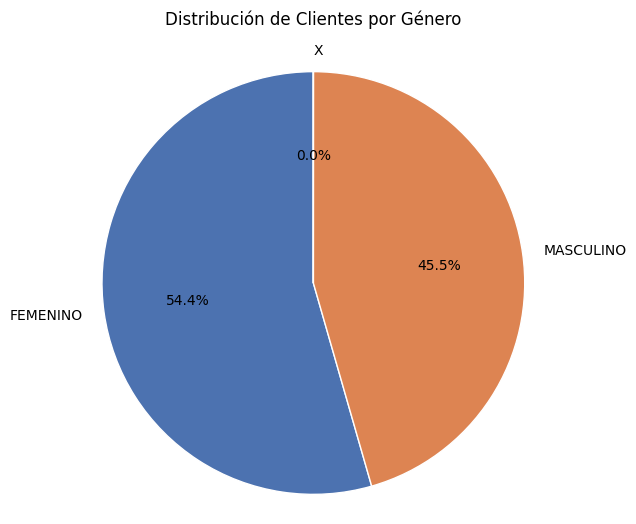

In [21]:
import matplotlib.pyplot as plt #importo para visualizaciones
colors = sns.color_palette('deep')
df_genero = df.groupby('GÉNERO')['CANTIDAD_CLIENTES'].sum()
plt.figure(figsize=(6,6))
plt.pie(
    df_genero,
    labels=df_genero.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'w'}
)
plt.title("Distribución de Clientes por Género", pad=20)
plt.axis('equal')

plt.show()



**Conclusión respecto al género**: la distribución de clientes es bastante equitativa entre mujeres y hombres, pero predomina el género femenino. Por otro lado  hay un porcentaje que no llega al 1% que no se identifica con los géneros tradicionales.

☑  **La edad de los clientes bancarizados**

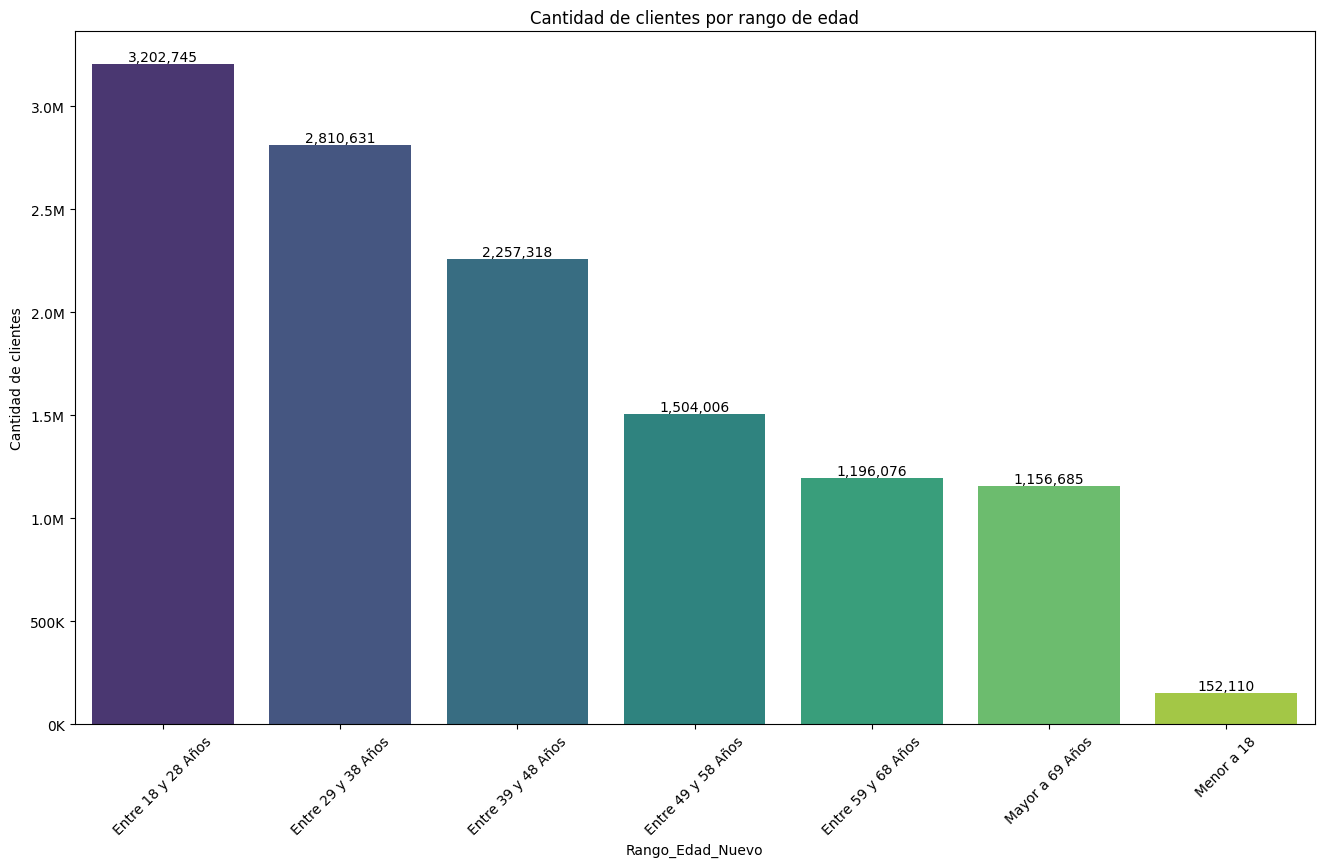

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df_edad = df.groupby('Rango_Edad_Nuevo')['CANTIDAD_CLIENTES'].sum().reset_index()
orden_rangos = df_edad.sort_values('Rango_Edad_Nuevo')['Rango_Edad_Nuevo']


plt.figure(figsize=(16,9))
ax= sns.barplot(x='Rango_Edad_Nuevo', y='CANTIDAD_CLIENTES', hue= 'Rango_Edad_Nuevo', data=df_edad, order=orden_rangos, palette= 'viridis')
plt.title('Cantidad de clientes por rango de edad')
plt.ylabel('Cantidad de clientes')

from matplotlib.ticker import FuncFormatter  #lo importe para luego poder corregir la unidad del eje y
def formato_miles(x, pos):
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'  # millones con 1 decimal
    else:
        return f'{x*1e-3:.0f}K'  # miles sin decimales

ax.yaxis.set_major_formatter(FuncFormatter(formato_miles))

for p in ax.patches:
    ax.annotate(
        format(int(p.get_height()), ',d'),  # pasar a numero a entero
        (p.get_x() + p.get_width() / 2., p.get_height()),  # posición sobre la barra
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )


plt.xticks(rotation=45)
plt.show()


↪ Los jóvenes adultos (18 a 38 años) representan casi la mitad de la cartera, con un gran potencial de vinculación digital

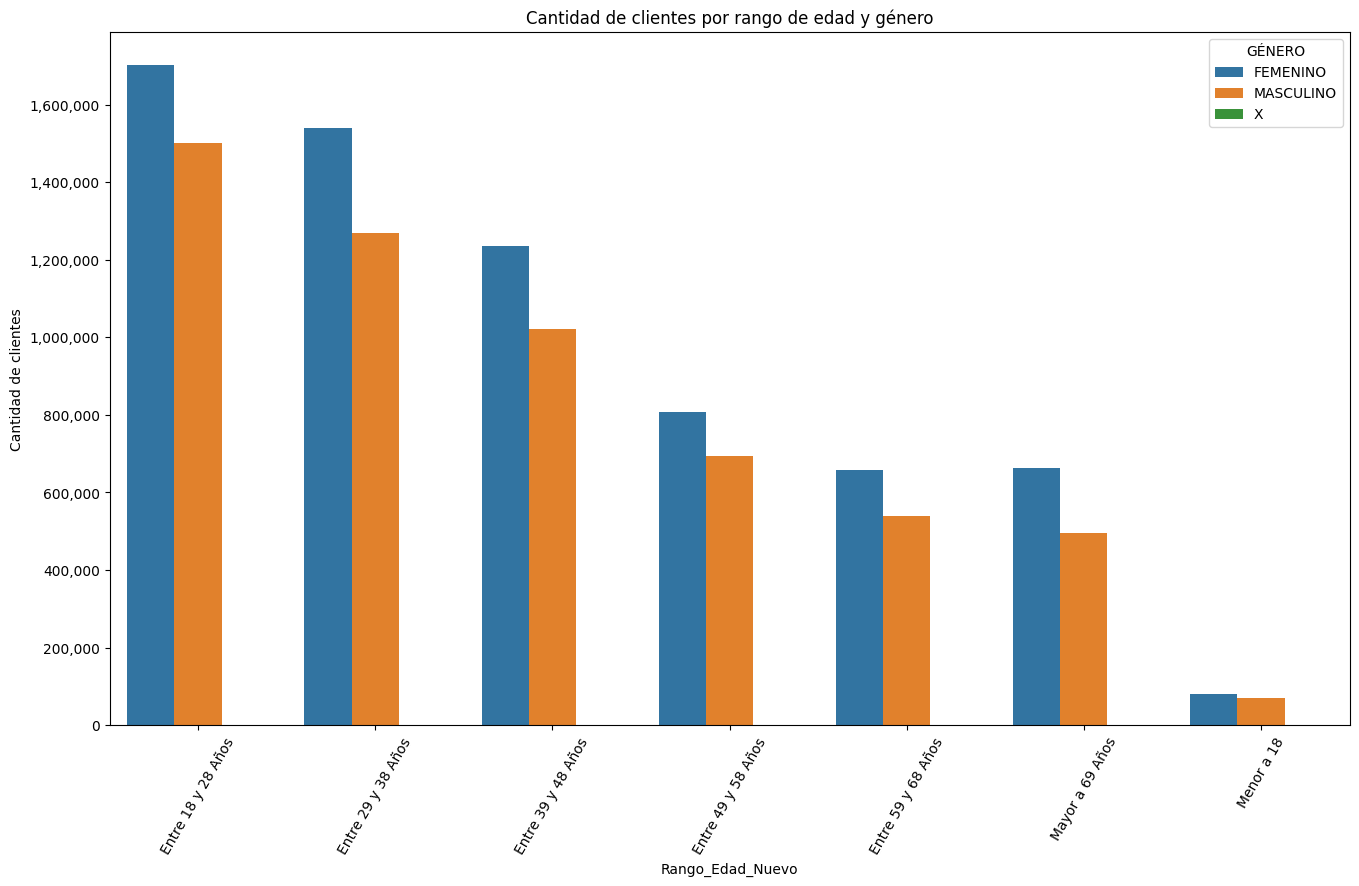

In [23]:
# Visualización Multivariada: Clientes por edad vs género
edad_genero_sum = df.groupby(['Rango_Edad_Nuevo','GÉNERO'])['CANTIDAD_CLIENTES'].sum().reset_index()

plt.figure(figsize=(16,9))
sns.barplot(data=edad_genero_sum, x='Rango_Edad_Nuevo', y='CANTIDAD_CLIENTES', hue='GÉNERO')
# Formato del eje Y con separador de miles
formatter = FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Cantidad de clientes por rango de edad y género')
plt.xticks(rotation=60)
plt.ylabel('Cantidad de clientes')
plt.show()


**Respuesta a H1** es cierto que la mayor proporción de clientes se concentra en rangos etarios intermedios (30-50 años). Pero mayoritarimente en rangos etarios más jóvenes.

🥇 **Top 10 - Provincias con mas clientes**

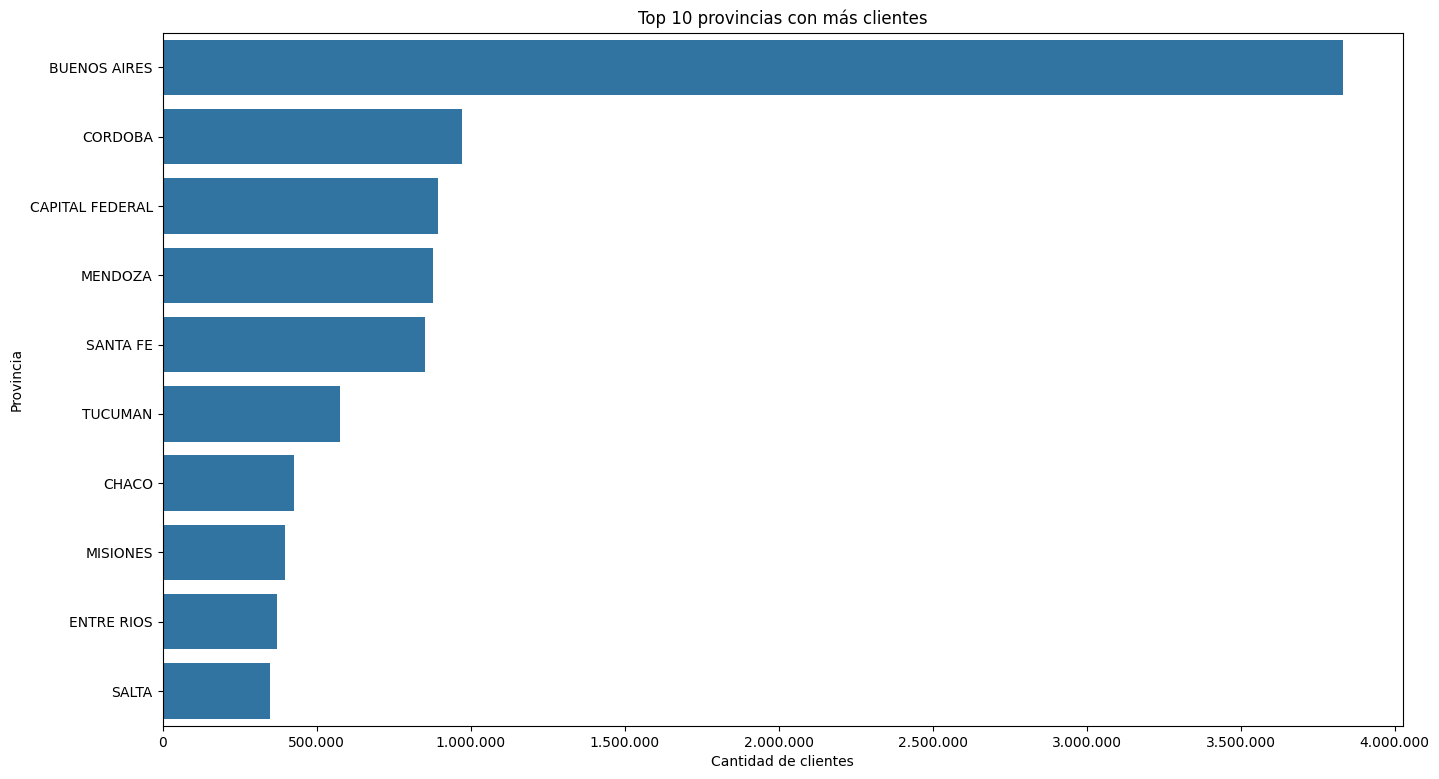

In [24]:
plt.figure(figsize=(16,9))
sns.barplot(x=provincia_sum.head(10).values, y=provincia_sum.head(10).index)

formatter = FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.'))
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Top 10 provincias con más clientes')
plt.xlabel('Cantidad de clientes')
plt.ylabel('Provincia')
plt.show()

**Respuesta H1** La mayor concentración de clientes se encuentra en las provincias con mayor densidad poblacional, encabezadas por Buenos Aires, Córdoba y Capital Federal. Esto indica que la distribución geográfica de la cartera refleja la concentración demográfica del país.

Ademas de ver como se compone la cartera del Top 10 de Provincias, se puede analizar la **actividad de esos clientes**.

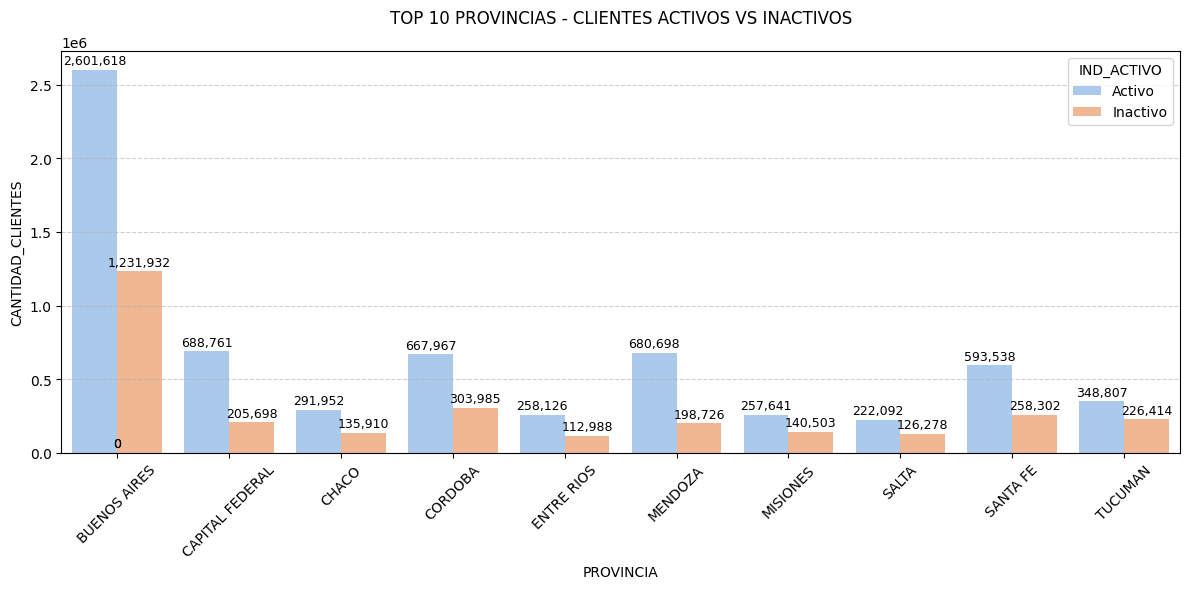

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 provincias por cantidad de clientes
top_provincias = df.groupby('PROVINCIA')['CANTIDAD_CLIENTES'].sum().nlargest(10).index
df_top = df[df['PROVINCIA'].isin(top_provincias)]

# Agrupar por provincia y estado activo sumando clientes
provincia_estado = (
    df_top.groupby(['PROVINCIA', 'IND_ACTIVO'])['CANTIDAD_CLIENTES']
    .sum()
    .reset_index()
)

# Gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=provincia_estado,
    x='PROVINCIA',
    y='CANTIDAD_CLIENTES',
    hue='IND_ACTIVO',
    palette='pastel'
)

plt.title('TOP 10 PROVINCIAS - CLIENTES ACTIVOS VS INACTIVOS', pad=20)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Etiquetas de valores encima de las barras
for p in ax.patches:
    ax.annotate(
        format(int(p.get_height()), ',d'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9,
        color='black',
        xytext=(0, 2),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()



↪  Como mencione la mayor concentración de clientes se encuentra en Buenos Aires, Capital Federal y Córdoba, lo que refleja la distribución poblacional del país. Sin embargo, se observa que en las provincias con mayor cantidad de clientes, existe una proporción significativa de  inactivos, lo que representa una oportunidad de estrategia focalizada en reactivación. En provincias con cartera de clientes menores, la brecha entre activos y clientes sin actividad es menor, lo que podría asociarse con mayor nivel de engagement.

**¿Existen diferencias significativas en la cantidad de productos contratados entre segmentos de edad y género?**
H2: ¿Clientes de mayor edad tienden a tener más productos contratados?

/tmp/ipython-input-1610401113.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


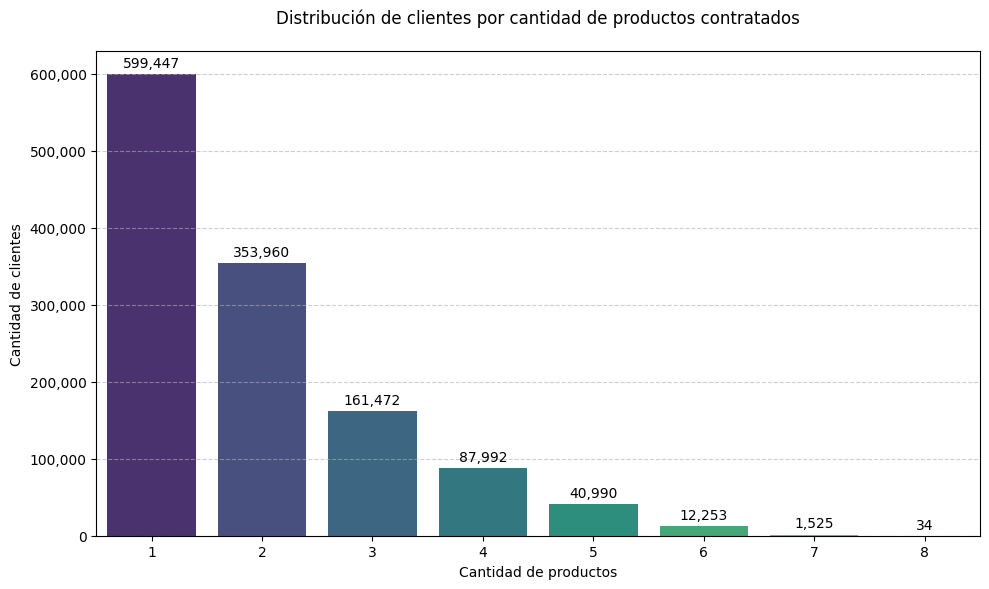

In [26]:
# Cantidad de clientes por cantidad de productos
productos_vs_clientes = (
    df.groupby('CANTIDAD_PRODUCTOS')
      .size()
      .reset_index(name='CANTIDAD_CLIENTES')
      .sort_values('CANTIDAD_PRODUCTOS')
)


import matplotlib.ticker as mticker

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=productos_vs_clientes,
    x='CANTIDAD_PRODUCTOS',
    y='CANTIDAD_CLIENTES',
    palette='viridis'
)
plt.title('Distribución de clientes por cantidad de productos contratados', pad=20)
plt.xlabel('Cantidad de productos')
plt.ylabel('Cantidad de clientes')

# Desactivar notación científica
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Anotar valores arriba de cada barra
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10, xytext=(0, 3),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por Rango_Edad_Nuevo y Cantidad_Productos
edad_producto = df.groupby(['Rango_Edad_Nuevo', 'CANTIDAD_PRODUCTOS']).size().reset_index(name='Cantidad_Clientes')


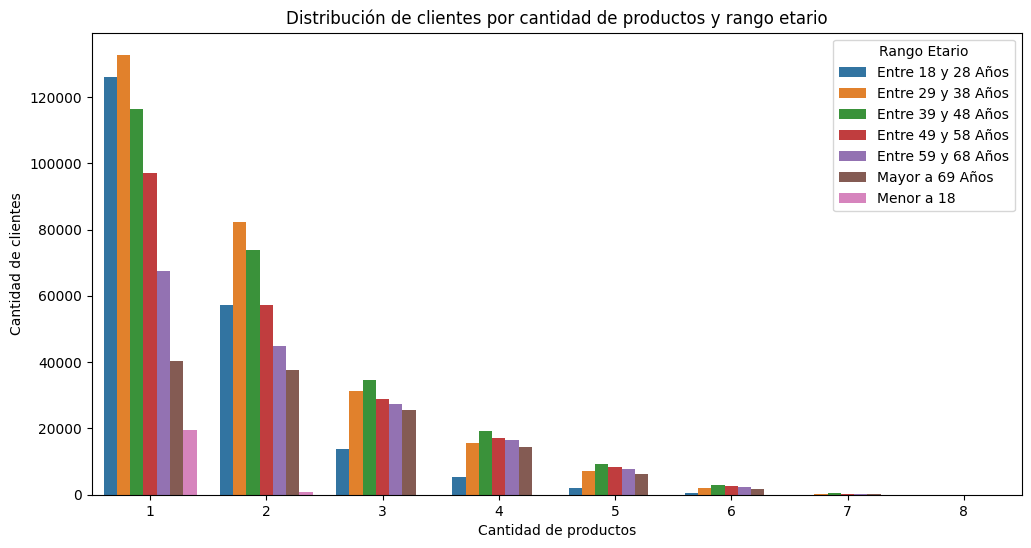

In [28]:
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=edad_producto,
    x='CANTIDAD_PRODUCTOS',
    y='Cantidad_Clientes',
    hue='Rango_Edad_Nuevo'
)

plt.title('Distribución de clientes por cantidad de productos y rango etario')
plt.xlabel('Cantidad de productos')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Rango Etario')
plt.show()


**Repuesta H2** La hipótesis no se cumple de forma estricta. No es cierto que a mayor edad, más productos. Más bien, los clientes de mediana edad (aproximadamente 29 a 58 años) tienden a tener más productos, mientras que los clientes muy jóvenes o muy mayores tienen menos.

**¿Qué combinaciones de productos son más frecuentes por tipo de cliente?** H3: Los clientes con tarjeta de crédito suelen tener también caja de ahorro en pesos.

<>:35: SyntaxWarning: invalid escape sequence '\ '
<>:35: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-1930151708.py:35: SyntaxWarning: invalid escape sequence '\ '
  print("\ TOP 20 COMBINACIONES MÁS FRECUENTES:\n")


ANÁLISIS DE COMBINACIONES DE PRODUCTOS
\ TOP 20 COMBINACIONES MÁS FRECUENTES:

Total de clientes analizados: 1257673
Combinaciones únicas encontradas: 48

--------------------------------------------------------------------------------
 1. CAJA_AHORRO + TJ_CREDITO                           | 852638 clientes (67.79%)
 2. CAJA_AHORRO + CAJA_AHORRO_USD + TJ_CREDITO         | 103289 clientes ( 8.21%)
 3. CAJA_AHORRO + PLAZOS_FIJOS + TJ_CREDITO            | 86033 clientes ( 6.84%)
 4. CAJA_AHORRO + SEGURO + TJ_CREDITO                  | 62337 clientes ( 4.96%)
 5. CAJA_AHORRO + CAJA_AHORRO_USD + SEGURO + TJ_CREDITO | 24121 clientes ( 1.92%)
 6. CAJA_AHORRO + CAJA_AHORRO_USD + PLAZOS_FIJOS + TJ_CREDITO | 21009 clientes ( 1.67%)
 7. CAJA_AHORRO + CAJA_AHORRO_USD + CTA_CTE + TJ_CREDITO | 18897 clientes ( 1.50%)
 8. CAJA_AHORRO + CTA_CTE + TJ_CREDITO                 | 16271 clientes ( 1.29%)
 9. CAJA_AHORRO + PLAZOS_FIJOS + SEGURO + TJ_CREDITO   | 15003 clientes ( 1.19%)
10. CAJA_AHORRO + CAJA_

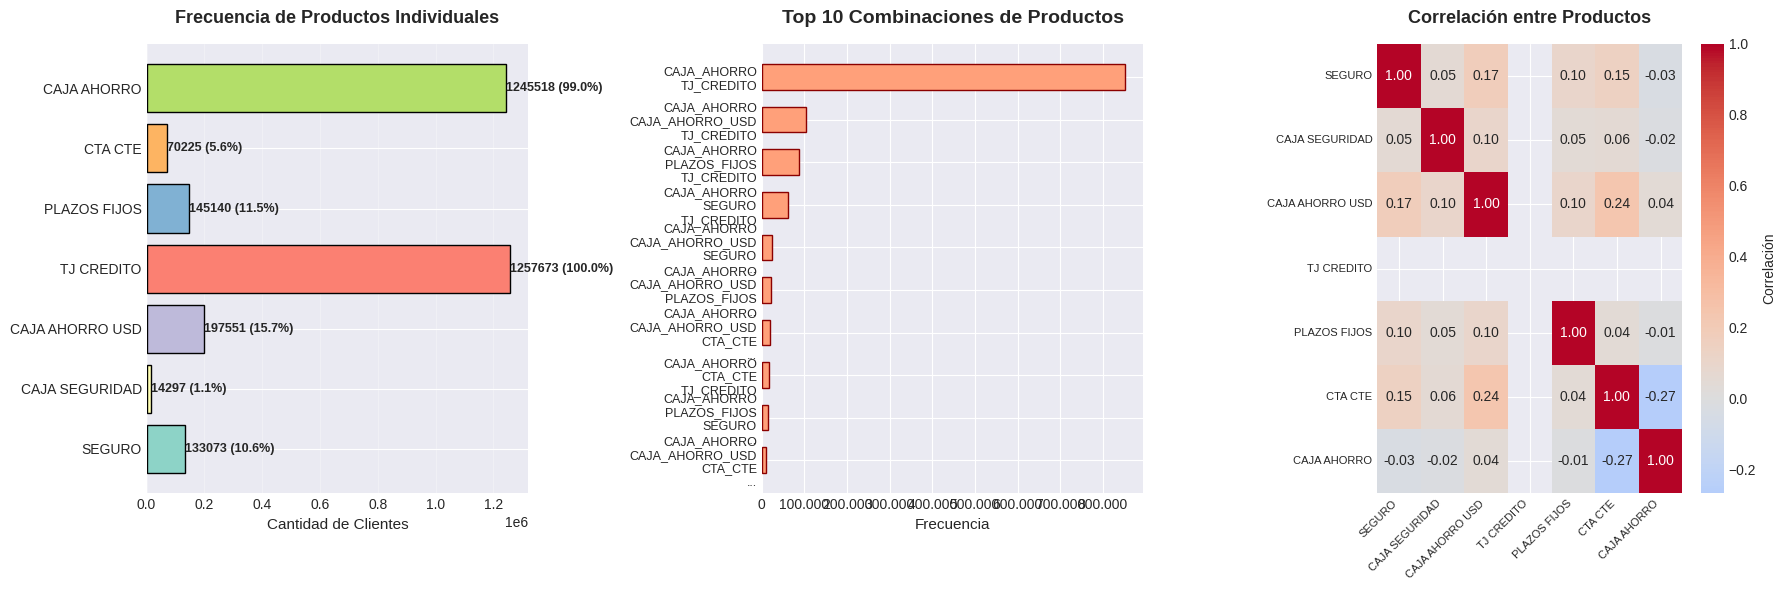



ANÁLISIS DE ASOCIACIÓN DE PRODUCTOS

Reglas de asociación (Si un cliente tiene el Producto A, 
¿qué probabilidad hay de que también tenga el Producto B?)
--------------------------------------------------------------------------------

Top 15 asociaciones más fuertes:

  • Si tiene SEGURO               → 100.0% tiene TJ_CREDITO           (133073 clientes)
  • Si tiene CAJA_AHORRO_USD      → 100.0% tiene TJ_CREDITO           (197551 clientes)
  • Si tiene CAJA_AHORRO_USD      → 100.0% tiene CAJA_AHORRO          (197551 clientes)
  • Si tiene CAJA_SEGURIDAD       → 100.0% tiene TJ_CREDITO           (14297 clientes)
  • Si tiene TJ_CREDITO           →  99.0% tiene CAJA_AHORRO          (1245518 clientes)
  • Si tiene PLAZOS_FIJOS         →  98.7% tiene CAJA_AHORRO          (143268 clientes)
  • Si tiene SEGURO               →  98.1% tiene CAJA_AHORRO          (130549 clientes)
  • Si tiene CAJA_SEGURIDAD       →  97.5% tiene CAJA_AHORRO          (13941 clientes)
  • Si tiene CTA_CTE     

In [29]:

from itertools import combinations
from collections import Counter


# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


# IDENTIFICAR PRODUCTOS (COLUMNAS BOOLEANAS)
productos_cols = ['SEGURO', 'CAJA_SEGURIDAD', 'CAJA_AHORRO_USD',
                  'TJ_CREDITO', 'PLAZOS_FIJOS', 'CTA_CTE', 'CAJA_AHORRO']


# CREAR COMBINACIONES DE PRODUCTOS

def obtener_productos_cliente(row):
    """Retorna lista de productos que tiene un cliente"""
    productos = []
    for col in productos_cols:
        if row[col] == 'Si':
            productos.append(col)
    return tuple(sorted(productos))

# Aplicar función para obtener combinaciones
df['Combinacion_Productos'] = df.apply(obtener_productos_cliente, axis=1)
df['Num_Productos'] = df['Combinacion_Productos'].apply(len)

print("=" * 80)
print("ANÁLISIS DE COMBINACIONES DE PRODUCTOS")
print("=" * 80)


# TOP COMBINACIONES GENERALES
print("\ TOP 20 COMBINACIONES MÁS FRECUENTES:\n")

combinaciones_generales = df['Combinacion_Productos'].value_counts().head(20)

print(f"Total de clientes analizados: {len(df)}")
print(f"Combinaciones únicas encontradas: {df['Combinacion_Productos'].nunique()}")
print("\n" + "-" * 80)

for i, (combo, freq) in enumerate(combinaciones_generales.items(), 1):
    porcentaje = (freq / len(df)) * 100
    if combo:
        productos_str = ' + '.join(combo)
    else:
        productos_str = 'Sin productos'
    print(f"{i:2d}. {productos_str:<50} | {freq:5d} clientes ({porcentaje:5.2f}%)")



# Estadísticas generales
print("\n" + "-" * 80)
print(f"Promedio de productos por cliente: {df['Num_Productos'].mean():.2f}")
print(f"Mediana de productos por cliente: {df['Num_Productos'].median():.0f}")
print(f"Mínimo de productos: {df['Num_Productos'].min():.0f}")
print(f"Máximo de productos: {df['Num_Productos'].max():.0f}")


# VISUALIZACIONES


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Frecuencia de productos individuales
ax1 = axes[0]
productos_freq = [(df[prod] == 'Si').sum() for prod in productos_cols]
productos_names = [prod.replace('_', ' ') for prod in productos_cols]
colors = plt.cm.Set3(range(len(productos_cols)))
ax1.barh(productos_names, productos_freq, color=colors, edgecolor='black')
ax1.set_title('Frecuencia de Productos Individuales',
              fontsize=13, fontweight='bold', pad=15)
ax1.set_xlabel('Cantidad de Clientes', fontsize=11)
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(productos_freq):
    ax1.text(v + 20, i, f'{v} ({v/len(df)*100:.1f}%)',
             va='center', fontsize=9, fontweight='bold')

from matplotlib.ticker import FuncFormatter

# Subplot 2: Top 10 combinaciones ---
# Subplot 2: Top 10 combinaciones
ax2 = axes[1]
top_combos = df['Combinacion_Productos'].value_counts().head(10)

combo_labels = []
for c in top_combos.index:
    if c:
        if isinstance(c, (list, tuple)):
            if len(c) <= 3:
                label = '\n'.join(c)
            else:
                label = '\n'.join(c[:3]) + '\n...'
        else:
            label = str(c)
    else:
        label = 'Sin productos'
    combo_labels.append(label)

y_pos = range(len(top_combos))

ax2.barh(y_pos, top_combos.values,
         color='#FFA07A',
         edgecolor='darkred',
         height=0.6)

ax2.set_yticks(y_pos)
ax2.set_yticklabels(combo_labels, fontsize=9)
ax2.invert_yaxis()

ax2.set_title('Top 10 Combinaciones de Productos', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Frecuencia', fontsize=11)

# Ajustes de eje X
ax2.ticklabel_format(style='plain', axis='x')
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

plt.tight_layout(pad=3)


# Subplot 3: Matriz de correlación de productos
ax3 = axes[2]
# Crear matriz binaria
productos_matrix = pd.DataFrame()
for prod in productos_cols:
    productos_matrix[prod] = (df[prod] == 'Si').astype(int)

# Calcular correlación
corr_matrix = productos_matrix.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, ax=ax3, cbar_kws={'label': 'Correlación'},
            xticklabels=[p.replace('_', ' ') for p in productos_cols],
            yticklabels=[p.replace('_', ' ') for p in productos_cols])
ax3.set_title('Correlación entre Productos',
              fontsize=13, fontweight='bold', pad=15)
plt.setp(ax3.get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.setp(ax3.get_yticklabels(), rotation=0, fontsize=8)

plt.tight_layout()
plt.savefig('analisis_combinaciones_productos.png', dpi=300, bbox_inches='tight')
plt.show()


# ANÁLISIS DE ASOCIACIÓN (REGLAS SIMPLES)

print("\n\n" + "=" * 80)
print("ANÁLISIS DE ASOCIACIÓN DE PRODUCTOS")
print("=" * 80)
print("\nReglas de asociación (Si un cliente tiene el Producto A, ")
print("¿qué probabilidad hay de que también tenga el Producto B?)")
print("-" * 80)

asociaciones = []

for i, prod1 in enumerate(productos_cols):
    tiene_prod1 = (df[prod1] == 'Si').sum()

    if tiene_prod1 > 0:
        for prod2 in productos_cols[i+1:]:
            tiene_ambos = ((df[prod1] == 'Si') & (df[prod2] == 'Si')).sum()
            prob_condicional = (tiene_ambos / tiene_prod1) * 100

            asociaciones.append({
                'Producto_Base': prod1,
                'Producto_Asociado': prod2,
                'Probabilidad': prob_condicional,
                'Frecuencia': tiene_ambos
            })

# Ordenar por probabilidad
asociaciones_df = pd.DataFrame(asociaciones).sort_values('Probabilidad', ascending=False)

# Mostrar las 15 asociaciones más fuertes
print("\nTop 15 asociaciones más fuertes:\n")
for idx, row in asociaciones_df.head(15).iterrows():
    print(f"  • Si tiene {row['Producto_Base']:<20} → {row['Probabilidad']:5.1f}% tiene {row['Producto_Asociado']:<20} ({row['Frecuencia']:.0f} clientes)")


# DataFrame con todas las combinaciones
df_resultados = df[['Combinacion_Productos', 'Num_Productos']].copy()
df_resultados['Productos_Lista'] = df_resultados['Combinacion_Productos'].apply(
    lambda x: ', '.join(x) if x else 'Sin productos')

# Tabla resumen de combinaciones
tabla_combinaciones = df['Combinacion_Productos'].value_counts().reset_index()
tabla_combinaciones.columns = ['Combinacion', 'Frecuencia']
tabla_combinaciones['Porcentaje'] = (tabla_combinaciones['Frecuencia'] / len(df) * 100).round(2)
tabla_combinaciones['Productos'] = tabla_combinaciones['Combinacion'].apply(
    lambda x: ', '.join(x) if x else 'Sin productos')


**H3: Los clientes con tarjeta de crédito suelen tener también caja de ahorro en pesos. **  La Hipotesis es correcta, y esa combinación de productos es de la más representativa de toda la cartera

Otro analisis es la cantidad de productos contratados de acuerdo a la Cartera a la que pertenecen.

/tmp/ipython-input-1953147443.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


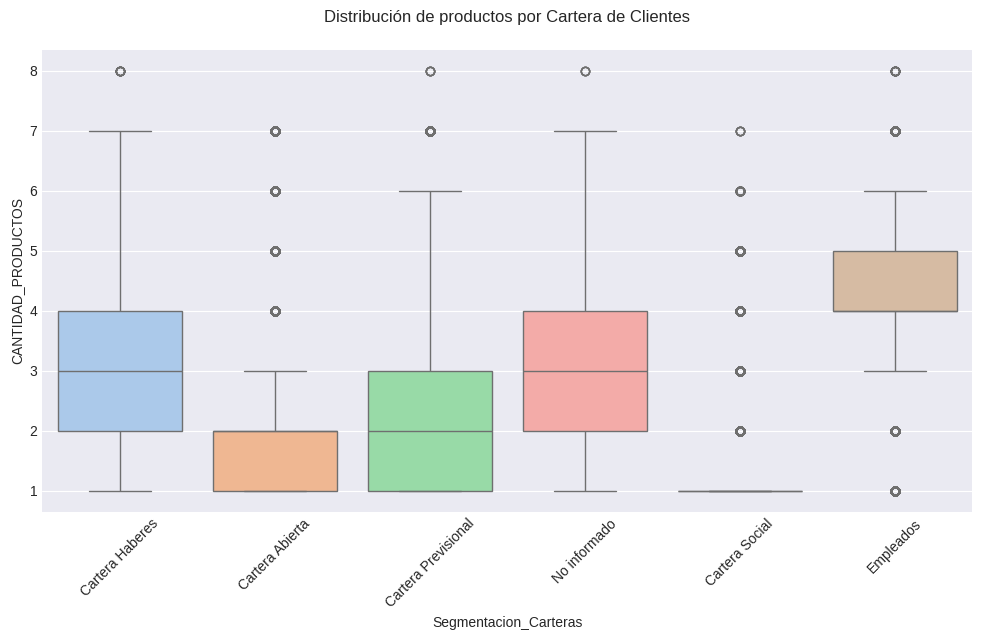

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Segmentacion_Carteras', y='CANTIDAD_PRODUCTOS' , hue='Segmentacion_Carteras', data=df, palette='pastel')
plt.title('Distribución de productos por Cartera de Clientes', pad=20)
plt.xticks(rotation=45)
plt.legend().set_visible(False)

plt.show()


↪ Con esta visualizacion podemos interpretar que:
La Cartera Haberes tiene una mediana de 3 productos.
La mayoría de los clientes tienen entre 2 y 4 productos. Y hay algunos outliers que compran hasta 7-8 productos.
Cartera Abierta tiene una mediana igual a 1 producto. La distribución es más concentrada; la mayoría tienen 1-2 productos. Algunos clientes contratan hasta 6 productos, serian outliers.
Por otro lado, la Cartera Previsional con una mediana de 2 productos. Un Rango intercuartílico de 1 a 3 productos, y varios outliers hasta 6-7 productos.
La Cartera Social logicamente tiene una mediana de 1 producto y outliers hasta 7 productos, casos aislados que deberian ser  revisados.
Los Empleados de la entidad se les ofrece los paquetes completos por eso la Mediana es de 4 productos, y un rango intercuartílico: 4 a 5 productos.

**DIGITALIZACION DE CLIENTES**
¿Qué proporción de clientes utiliza canales digitales y cómo varía según grupo etario?

H4: Los clientes jóvenes presentan mayor adopción de canales digitales que los mayores.

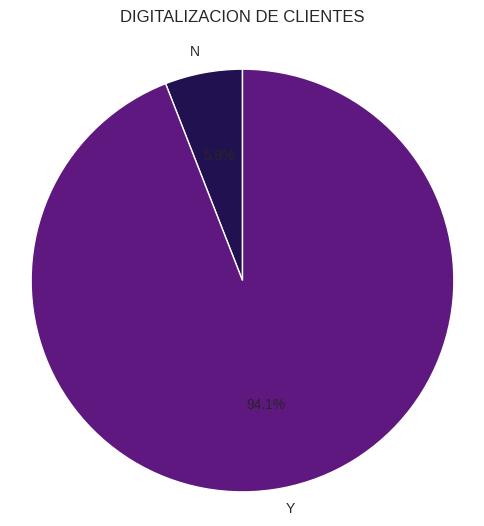

In [31]:
colors = sns.color_palette('magma')
df_genero = df.groupby('IND_DIGITAL')['CANTIDAD_CLIENTES'].sum()
plt.figure(figsize=(6,6))
plt.pie(
    df_genero,
    labels=df_genero.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'w'}
)
plt.title("DIGITALIZACION DE CLIENTES", pad=20)
plt.axis('equal')

plt.show()


El 94% de los clientes utiliza un canal digital para operar con el banco.

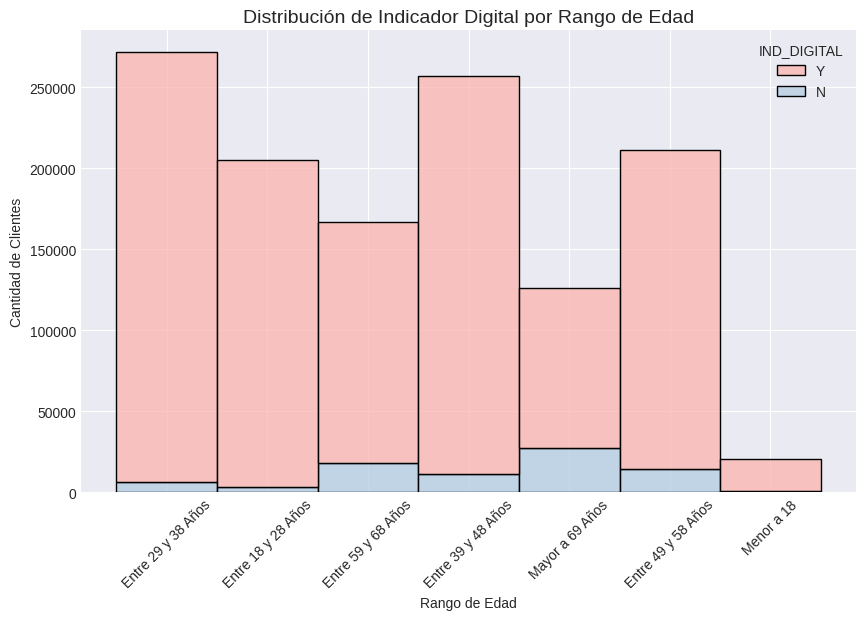

In [32]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Rango_Edad_Nuevo', hue='IND_DIGITAL', multiple='stack', palette='Pastel1')

plt.title('Distribución de Indicador Digital por Rango de Edad', fontsize=14)
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.show()


**Respuesta H4** ¿Los clientes jóvenes presentan mayor adopción de canales digitales que los mayores?  Esta visualizacion demuestra que la hipotesis es correcta, los clientes jovenes son los que mayor proporcion de digitalizacion tienen.

¿Existe relación entre la digitalización y la cantidad de productos contratados?

H5: A mayor adopción digital, mayor contratación de productos.

In [33]:
import pandas as pd

# Verificamos distribución general
df['IND_DIGITAL'].value_counts()
df.groupby('IND_DIGITAL')['CANTIDAD_PRODUCTOS'].describe()


,count,mean,std,min,25%,50%,75%,max
IND_DIGITAL,,,,,,,,
N,82175.0,2.209455,1.054545,1.0,1.0,2.0,3.0,7.0
Y,1175498.0,1.915447,1.171694,1.0,1.0,2.0,2.0,8.0


/tmp/ipython-input-3841065767.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='IND_DIGITAL', y='CANTIDAD_PRODUCTOS', palette='pastel')


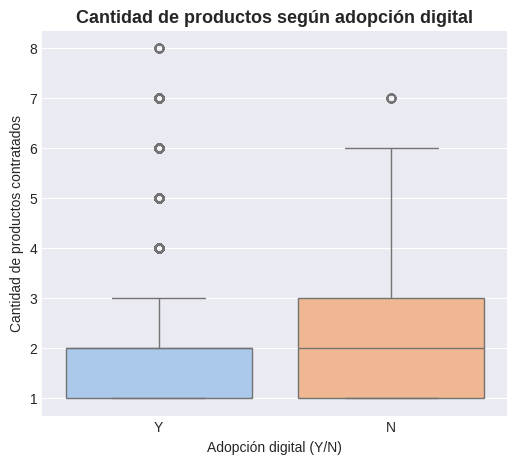

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='IND_DIGITAL', y='CANTIDAD_PRODUCTOS', palette='pastel')
plt.title('Cantidad de productos según adopción digital', fontsize=13, fontweight='bold')
plt.xlabel('Adopción digital (Y/N)')
plt.ylabel('Cantidad de productos contratados')
plt.show()


A partir de la visualización se puede interpretar que la mediana de productos contratados es similar (2) en ambos grupos, pero los no digitales (N) tienen una ligera tendencia a contratar más productos en promedio y una menor dispersión hacia los valores bajos. **Respuesta H5** Los resultados muestran una diferencia significativa, pero en sentido contrario a lo esperado: los clientes no digitales presentan una media ligeramente superior de productos contratados.

# **Desarrollo del Modelo de Machine Learning**
1- Analisis de la Variable Objetivo

In [35]:
#Distribucion de clases en la variable objetivo

print(df['IND_ACTIVO'].value_counts())
print(df['IND_ACTIVO'].value_counts(normalize=True))

IND_ACTIVO
Inactivo    699647
Activo      558026
Name: count, dtype: int64
IND_ACTIVO
Inactivo    0.556303
Activo      0.443697
Name: proportion, dtype: float64


# ALGORITMO DE CLASIFICACIÓN

**✅RANDOM FOREST**

/tmp/ipython-input-2965346191.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace({'SI': 1, 'SÍ': 1, 'NO': 0}).fillna(0).astype(int)
/tmp/ipython-input-2965346191.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace({'SI': 1, 'SÍ': 1, 'NO': 0}).fillna(0).astype(int)
/tmp/ipython-input-2965346191.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(c

Dataset: 1257673 filas, 17 features
Distribución target: {0: 699647, 1: 558026}

 Train: 1006138 | Test: 251535

 Train: 1006138 grupos (9,811,783 clientes)
Test: 251535 grupos (2,467,788 clientes)

✅ Top 10 Features seleccionadas:
  CANTIDAD_PRODUCTOS: 0.2475
  Num_Productos: 0.1360
  PROVINCIA: 0.1143
  Segmento_Tarjeta: 0.1046
  Segmentacion_Carteras: 0.0744
  IND_DIGITAL: 0.0564
  Rango_Edad_Nuevo: 0.0412
  SEGURO: 0.0322
  CAJA_AHORRO_USD: 0.0139
  PLAZOS_FIJOS: 0.0125

RESULTADOS

AUC-ROC:
  Train: 0.8040
  Test:  0.7814

 Classification Report (Test):
              precision    recall  f1-score   support

    Inactivo       0.61      0.37      0.46  760624.0
      Activo       0.76      0.89      0.82 1707164.0

    accuracy                           0.73 2467788.0
   macro avg       0.68      0.63      0.64 2467788.0
weighted avg       0.71      0.73      0.71 2467788.0


Confusion Matrix (Test):
[[ 283518  477106]
 [ 183077 1524087]]

TN: 283,518 clientes | FP: 477,106 cliente

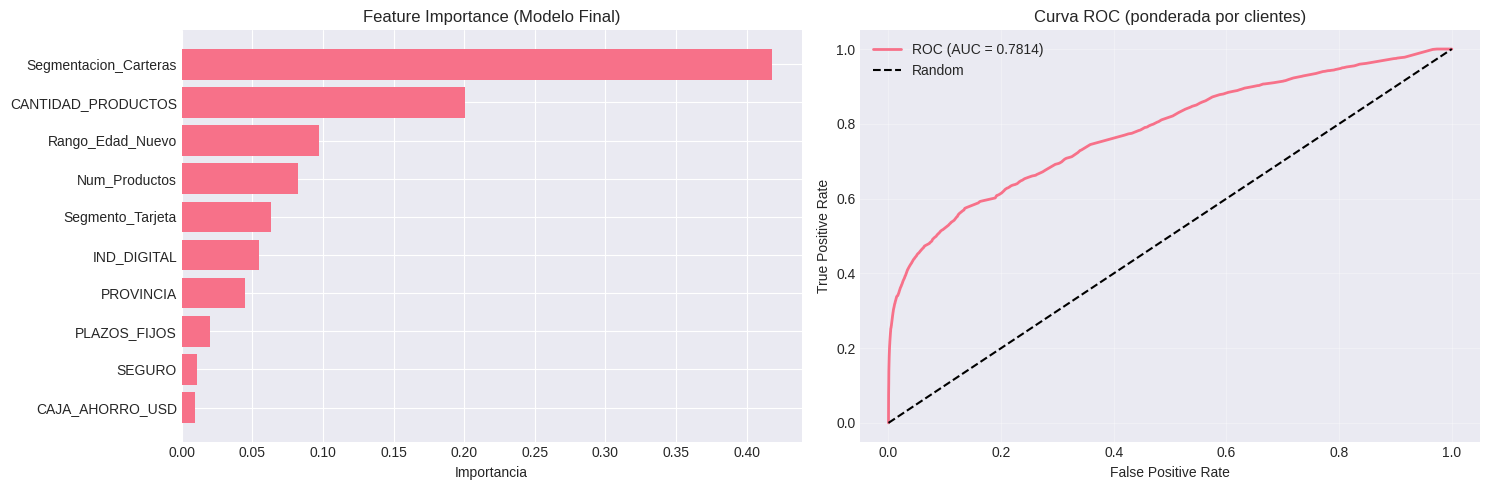


✅ Proceso completado


In [36]:
# PREDICCIÓN DE IND_ACTIVO (Random Forest con Feature Selection)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# PREPARACIÓN DE DATOS
data = df.copy()

# Convertir variable objetivo en binaria
data['IND_ACTIVO'] = data['IND_ACTIVO'].map({'Activo': 1, 'Inactivo': 0})

# Limpiar columnas que no sirven en el modelo
data = data.drop(columns=['Combinacion_Productos'], errors='ignore')

# Imputar valores faltantes
data['Segmentacion_Carteras'] = data['Segmentacion_Carteras'].fillna('Sin segmentar')
data['GÉNERO'] = data['GÉNERO'].fillna('No informado')
data['Segmento_Tarjeta'] = data['Segmento_Tarjeta'].fillna('Sin tarjeta')

# Convertir columnas binarias a variables con dato: Si/No
for col in ['SEGURO', 'CAJA_SEGURIDAD', 'CAJA_AHORRO_USD',
            'TJ_CREDITO', 'PLAZOS_FIJOS', 'CTA_CTE', 'CAJA_AHORRO']:
    if col in data.columns:
        data[col] = data[col].astype(str).str.upper().str.strip()
        data[col] = data[col].replace({'SI': 1, 'SÍ': 1, 'NO': 0}).fillna(0).astype(int)

# Convertir columna binaria a IND_DIGITAL: Y/N
if 'IND_DIGITAL' in data.columns:
    data['IND_DIGITAL'] = data['IND_DIGITAL'].astype(str).str.upper().str.strip()
    data['IND_DIGITAL'] = data['IND_DIGITAL'].replace({'Y': 1, 'N': 0}).fillna(0).astype(int)

# Codificar variables categóricas
cols_categoricas = ['PROVINCIA', 'Rango_Edad_Nuevo', 'Segmentacion_Carteras',
                    'GÉNERO', 'Segmento_Tarjeta']
le = LabelEncoder()
for col in cols_categoricas:
    if col in data.columns:
        data[col] = le.fit_transform(data[col].astype(str))

# Eliminar variables con fuga de informacion: las siguientes variables determinan el activo/inactivo.
cols_leakage = ['ULTIMO_USO', 'Sin_Actividad']
data = data.drop(columns=cols_leakage, errors='ignore')

# Separar features y target
X = data.drop('IND_ACTIVO', axis=1)
y = data['IND_ACTIVO']

print(f"Dataset: {X.shape[0]} filas, {X.shape[1]} features")
print(f"Distribución target: {y.value_counts().to_dict()}")

# TRAIN/TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n Train: {X_train.shape[0]} | Test: {X_test.shape[0]}")


# La columna CANTIDAD_CLIENTES es un agrupador, suma clientes  por eso no puede tomarse como variables mas, pero si el peso que tiene la cantidad
sample_weights_train = X_train['CANTIDAD_CLIENTES'].values
sample_weights_test = X_test['CANTIDAD_CLIENTES'].values

print(f"\n Train: {X_train.shape[0]} grupos ({sample_weights_train.sum():,.0f} clientes)")
print(f"Test: {X_test.shape[0]} grupos ({sample_weights_test.sum():,.0f} clientes)")

# Crear copia SIN CANTIDAD_CLIENTES para feature selection
X_train_fs = X_train.drop('CANTIDAD_CLIENTES', axis=1)
X_test_fs = X_test.drop('CANTIDAD_CLIENTES', axis=1)

# FEATURE SELECTION = RF Feature Importance

rf_selector = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
rf_selector.fit(X_train, y_train)

# Seleccionar top features
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)

feature_importance = feature_importance[feature_importance['feature'] != 'CANTIDAD_CLIENTES']

# Configurar número de features a usar
top_n = 10
selected_features = feature_importance.head(top_n)['feature'].tolist()

print(f"\n✅ Top {top_n} Features seleccionadas:")
for i, row in feature_importance.head(top_n).iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")

# Aplicar selección
X_train_selected = X_train_fs[selected_features]
X_test_selected = X_test_fs[selected_features]

# ENTRENAMIENTO DEL MODELO

rf_final = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_final.fit(X_train_selected, y_train, sample_weight=sample_weights_train)



# EVALUACIÓN DEL MODELO

# Predicciones
y_pred_train = rf_final.predict(X_train_selected)
y_prob_train = rf_final.predict_proba(X_train_selected)[:, 1]

y_pred_test = rf_final.predict(X_test_selected)
y_prob_test = rf_final.predict_proba(X_test_selected)[:, 1]

# Métricas
print("\n" + "="*50)
print("RESULTADOS")
print("="*50)

print(f"\nAUC-ROC:")
print(f"  Train: {roc_auc_score(y_train, y_prob_train, sample_weight=sample_weights_train):.4f}")
print(f"  Test:  {roc_auc_score(y_test, y_prob_test, sample_weight=sample_weights_test):.4f}")

print(f"\n Classification Report (Test):")
print(classification_report(y_test, y_pred_test,
                          target_names=['Inactivo', 'Activo'],
                          sample_weight=sample_weights_test))

print(f"\nConfusion Matrix (Test):")
from sklearn.metrics import confusion_matrix
cm_weighted = confusion_matrix(y_test, y_pred_test, sample_weight=sample_weights_test)
print(cm_weighted)
print(f"\nTN: {cm_weighted[0,0]:,.0f} clientes | FP: {cm_weighted[0,1]:,.0f} clientes")
print(f"FN: {cm_weighted[1,0]:,.0f} clientes | TP: {cm_weighted[1,1]:,.0f} clientes")

# VISUALIZACIONES

# Feature Importance del modelo final
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Importancias finales
final_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_final.feature_importances_
}).sort_values('importance', ascending=False)

axes[0].barh(final_importance['feature'], final_importance['importance'])
axes[0].invert_yaxis()
axes[0].set_title('Feature Importance (Modelo Final)')
axes[0].set_xlabel('Importancia')

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_test, sample_weight=sample_weights_test)
auc_score = roc_auc_score(y_test, y_prob_test, sample_weight=sample_weights_test)
axes[1].plot(fpr, tpr, label=f'ROC (AUC = {auc_score:.4f})', linewidth=2)
axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Curva ROC (ponderada por clientes)')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Proceso completado")

# **CONCLUSIONES DEL PROYECTO**

**Aclaraciones del proyecto**

*METODOLOGÍA*
Feature Selection
Método: Random Forest Feature Importance con sample_weight
Reducción: De 17 features a 10 features óptimas

*Algoritmo*
Modelo: Random Forest Classifier
Configuración:
300 árboles
max_depth=15
sample_weight basado en CANTIDAD_CLIENTES


Se desarrolló un modelo de clasificación para predecir el estado de actividad de clientes bancarios utilizando **Random Forest** con Feature Selection. El modelo fue entrenado sobre 9.8 millones de clientes y validado sobre 2.5 millones de clientes.
Resultados principales:
✅ AUC-ROC: 0.7814 (bueno aunque no perfecto).
✅ Accuracy: 73%  (3 de cada 4 clientes bien clasificados)


Clientes ACTIVOS
✅ Recall: 89% - Identifica correctamente al 89% de los activos (identifica correctamente 9 de cada 10 clientes activos)
✅ Precision: 76% - De los que predice como activos, 76% realmente lo son
✅ F1-Score: 0.82 - Buen balance entre precision y recall

Clientes INACTIVOS
⚠️ Recall: 37% - Solo identifica al 37% de los inactivos (oportunidad de mejora)
✅ Precision: 61% - De los que predice como inactivos, 61% realmente lo son
⚠️ F1-Score: 0.46 - Bajo, indica dificultad para identificar esta clase

Interpretación Matriz de Confusión
Falsos Positivos (FP): 477,106 clientes (63% de inactivos), es decir Clientes inactivos que el modelo predice como activos.
El impacto en el negocio: la base clientes activos quedaria sucia con clientes que no estan teniendo operatoria comercial y deberían estar identificados para su reactivación ofreciendole por ejemplo bonificaciones o enviando campañas vía emails.
Representa: El 19% del total de predicciones

Falsos Negativos (FN): 183,077 clientes (11% de activos) , son Clientes activos que el modelo predice como inactivos. Representa: El 7% del total de predicciones
Impacto en el negocio: Clientes activos que podrían recibir menos atención o quedar incluidos en campañas de activación malgastando recursos.

**Conclusiones del Modelo**
Alta capacidad de identificar clientes activos, el modelo detecta mejor clientes que permanecerán activos. Esto sería muy útil para campañas de Scoring para upselling  o cross-selling dirigidas.

La debilidad del modelo se ve en la detección de Inactivos, se podría implementar programas de retención preventiva, ya que aunque el recall es bajo (37%), los inactivos detectados tienen 61% precision.

A partir del Resultado de Feature Selection podemos interpretar que de acuerdo a la importancia que tiene la CANTIDAD_PRODUCTOS (24.75%), estrategias de negocio podrían ser:
- Programa de Cross-Selling Agresivo: Clientes con 1-2 productos serían los Target prioritarios para ofrecer nuevos productos adicionales, incentivar contratación de combo de productos (descuentos por paquete).
- Alerta Temprana por Reducción de Productos (clientes que solicitan baja de productos)
- Onboarding Multiproducto: Nuevos clientes Ofrecerles múltiples productos desde el inicio, Bundle de bienvenida (cuenta + tarjeta + seguro).

En segundo lugar, basado en PROVINCIA (11.43%):
Estrategias Regionales Diferenciadas
Analizar qué provincias tienen mayor actividad
Adaptar productos/servicios según comportamiento regional.


**El insight más valioso es que la cantidad y diversificación de productos contratados es el factor determinante de la actividad del cliente, sugiriendo que estrategias de cross-selling son críticas para retención.**

La **debilidad** del modelo es la detección de Inactivos, los clientes inactivos probablemente son más difíciles de distinguir o tienen comportamientos más variados.




In [37]:
#**Opción de Mejora**

# Ajustar Umbral
for threshold in [0.3, 0.4, 0.45, 0.5, 0.55, 0.6]:

    y_pred_new = (y_prob_test >= threshold).astype(int)

    # Evaluar
    cm = confusion_matrix(y_test, y_pred_new, sample_weight=sample_weights_test)
    recall_inactivo = cm[0,0] / (cm[0,0] + cm[0,1])
    recall_activo = cm[1,1] / (cm[1,0] + cm[1,1])

    print(f"\nUmbral {threshold:.2f}:")
    print(f"  Recall Inactivos: {recall_inactivo:.2%}")
    print(f"  Recall Activos: {recall_activo:.2%}")


Umbral 0.30:
  Recall Inactivos: 2.68%
  Recall Activos: 100.00%

Umbral 0.40:
  Recall Inactivos: 10.90%
  Recall Activos: 97.32%

Umbral 0.45:
  Recall Inactivos: 23.02%
  Recall Activos: 93.93%

Umbral 0.50:
  Recall Inactivos: 37.27%
  Recall Activos: 89.28%

Umbral 0.55:
  Recall Inactivos: 44.45%
  Recall Activos: 85.71%

Umbral 0.60:
  Recall Inactivos: 54.13%
  Recall Activos: 79.14%


## Conclusión: Optimización del Umbral de Clasificación

### Análisis de Costo-Beneficio

El modelo Random Forest entrenado arroja un **AUC-ROC de 0.7814**, lo que indica una capacidad predictiva aceptable. Sin embargo, el umbral de clasificación por defecto (0.50) no sería tan óptimo para el objetivo de negocio.

Comparación de Umbrales

**Umbral 0.50 (Default):**
- Recall Activos: 89.28%
- Recall Inactivos: 37.27%
- **Problema:** Se pierden el 63% de los clientes inactivos sin detectar, perdiendo la oportunidad de reactivarlos.

**Umbral 0.60 (Optimizado):**
- Recall Activos: 79.14%
- Recall Inactivos: 54.13%
- **Beneficio:** Se detectan ~130,000 clientes inactivos adicionales.

### Justificación del Umbral 0.60

El costo de negocio de cada escenario es asimétrico:

**Escenario 1 - Cliente inactivo NO detectado (Falso Negativo):**
- El cliente abandona el banco sin intervención
- **Costo:** Alto - Pérdida de ingresos futuros, valor de vida del cliente (LTV)

**Escenario 2 - Cliente activo mal clasificado como inactivo (Falso Positivo):**
- Se envía campaña de reactivación innecesaria
- **Costo:** Bajo - Solo costo de email/SMS

### Decisión Final

Se recomienda implementar el **umbral de 0.60**, ya que:
- Maximiza la detección de clientes en riesgo de inactividad (54% vs 37%)
- Permite intervenir proactivamente con ~130,000 clientes adicionales
- Sacrificar 10% de precisión en activos para ganar 17% en detección de inactivos
